In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("C:/Users/Nill/Desktop/datasets/data.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
def read_dataset():

    #independet variable or matrix of features (index from 2 to 31)
    X = dataset[dataset.columns[2:32]].values

    #get the dependent variable that has an index of 1
    y1 = dataset[dataset.columns[1]]

    #encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y1)
    
    y = encoder.transform(y1)
    Y = one_hot_encode(y)
    
    print(X.shape)
    return (X, Y, y1)

In [3]:
#define the encoder function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [4]:
#read the dataset
X, Y, y1 = read_dataset()
#shuffle the dataset
X, Y = shuffle(X, Y, random_state=1)

(569, 30)


In [5]:
#split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=415)

In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler

#create StandaradScaler object
sc_X = StandardScaler()

#fit it to the train dataset
X_train = sc_X.fit_transform(X_train)
#no need to fit to the test set (since its already fitted in train set)
X_test = sc_X.transform(X_test)

In [7]:
#inspect the shape of training and testing data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(455, 30)
(455, 2)
(114, 30)


In [8]:
#defining the important parameters and variable to work with the tensors
learning_rate = 0.001
training_epochs = 500

#loss function
cost_history = np.empty(shape=[1], dtype=float)

#columns in X
n_dim = X.shape[1]

#will print all the column in X variable
print("n_dim", "="," ", n_dim)

#malignant or benign
n_class = 2

model_path = 'C:/Users/Nill/Desktop/conda_jupyter/data.cvv_models/TFM'

n_dim =   30


In [9]:
#define the number of hidden layers and neurons for each layer

#multi-layer perceptrons
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

#we will feed in the dataset
x = tf.placeholder(tf.float32, [None, n_dim])

#w will be initialized with zeros
W = tf.Variable(tf.zeros([n_dim, n_class]))

#b will be initialized with zeros with a shape of n_class
b = tf.Variable(tf.zeros([n_class]))

#y_out is the output of the model that we already know
y_out = tf.placeholder(tf.float32, [None, n_class])

In [10]:
#define the model

def multilayer_perceptron(x, weights, biases):
    
    #Hidden layers
    
    #first layer will be the matrix multiplication of input and weight, then added to the bias
    #initiated with sigmoid activation function
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #for second hidden layer, the input will be the output of first hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #for third hidden layer, the input will be the output of second hidden layer
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    #for fourth hidden layer, the input will be the output of third hidden layer
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #final output layer with linear activation function
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

In [11]:
#define the weights and biases for each layer

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

epoch:  0  -  cost:  8.23681  - MSE:  155.633901953  - Train Accuary:  0.628571
epoch:  1  -  cost:  7.76911  - MSE:  142.796411873  - Train Accuary:  0.624176
epoch:  2  -  cost:  7.30619  - MSE:  130.745771716  - Train Accuary:  0.624176
epoch:  3  -  cost:  6.84967  - MSE:  119.494359661  - Train Accuary:  0.628571
epoch:  4  -  cost:  6.40154  - MSE:  109.039603362  - Train Accuary:  0.630769
epoch:  5  -  cost:  5.96417  - MSE:  99.3890841146  - Train Accuary:  0.628571
epoch:  6  -  cost:  5.54093  - MSE:  90.5485756476  - Train Accuary:  0.621978
epoch:  7  -  cost:  5.13674  - MSE:  82.5347070413  - Train Accuary:  0.628571
epoch:  8  -  cost:  4.7568  - MSE:  75.3534531822  - Train Accuary:  0.637363
epoch:  9  -  cost:  4.40437  - MSE:  68.9910895296  - Train Accuary:  0.63956
epoch:  10  -  cost:  4.08242  - MSE:  63.4182681426  - Train Accuary:  0.650549
epoch:  11  -  cost:  3.79182  - MSE:  58.5917388797  - Train Accuary:  0.652747
epoch:  12  -  cost:  3.53059  - MSE:  5

epoch:  103  -  cost:  1.24982  - MSE:  33.2294965066  - Train Accuary:  0.76044
epoch:  104  -  cost:  1.24405  - MSE:  33.2339537989  - Train Accuary:  0.762637
epoch:  105  -  cost:  1.23835  - MSE:  33.2385701465  - Train Accuary:  0.762637
epoch:  106  -  cost:  1.23271  - MSE:  33.243514517  - Train Accuary:  0.762637
epoch:  107  -  cost:  1.22713  - MSE:  33.2488068661  - Train Accuary:  0.762637
epoch:  108  -  cost:  1.22161  - MSE:  33.2543264063  - Train Accuary:  0.767033
epoch:  109  -  cost:  1.21616  - MSE:  33.260137185  - Train Accuary:  0.769231
epoch:  110  -  cost:  1.21076  - MSE:  33.2662225056  - Train Accuary:  0.769231
epoch:  111  -  cost:  1.20541  - MSE:  33.2727704702  - Train Accuary:  0.767033
epoch:  112  -  cost:  1.20012  - MSE:  33.2795855509  - Train Accuary:  0.769231
epoch:  113  -  cost:  1.19488  - MSE:  33.2865856518  - Train Accuary:  0.769231
epoch:  114  -  cost:  1.1897  - MSE:  33.2938479123  - Train Accuary:  0.769231
epoch:  115  -  cost

epoch:  204  -  cost:  0.870489  - MSE:  34.342830356  - Train Accuary:  0.808791
epoch:  205  -  cost:  0.868042  - MSE:  34.3553552117  - Train Accuary:  0.808791
epoch:  206  -  cost:  0.865612  - MSE:  34.3678407157  - Train Accuary:  0.808791
epoch:  207  -  cost:  0.863195  - MSE:  34.3803187491  - Train Accuary:  0.808791
epoch:  208  -  cost:  0.860779  - MSE:  34.3925060791  - Train Accuary:  0.810989
epoch:  209  -  cost:  0.858373  - MSE:  34.4049827847  - Train Accuary:  0.810989
epoch:  210  -  cost:  0.855967  - MSE:  34.4177545645  - Train Accuary:  0.810989
epoch:  211  -  cost:  0.853575  - MSE:  34.43052968  - Train Accuary:  0.813187
epoch:  212  -  cost:  0.851199  - MSE:  34.443146171  - Train Accuary:  0.815385
epoch:  213  -  cost:  0.848838  - MSE:  34.4554415997  - Train Accuary:  0.815385
epoch:  214  -  cost:  0.84649  - MSE:  34.467749863  - Train Accuary:  0.815385
epoch:  215  -  cost:  0.844139  - MSE:  34.4796700612  - Train Accuary:  0.817582
epoch:  21

epoch:  305  -  cost:  0.678206  - MSE:  35.4069302338  - Train Accuary:  0.843956
epoch:  306  -  cost:  0.676751  - MSE:  35.4161814702  - Train Accuary:  0.843956
epoch:  307  -  cost:  0.675303  - MSE:  35.4253837942  - Train Accuary:  0.846154
epoch:  308  -  cost:  0.67386  - MSE:  35.4345724966  - Train Accuary:  0.846154
epoch:  309  -  cost:  0.672424  - MSE:  35.4437630465  - Train Accuary:  0.846154
epoch:  310  -  cost:  0.670996  - MSE:  35.4529323128  - Train Accuary:  0.846154
epoch:  311  -  cost:  0.669573  - MSE:  35.4620990487  - Train Accuary:  0.846154
epoch:  312  -  cost:  0.668154  - MSE:  35.4712571641  - Train Accuary:  0.846154
epoch:  313  -  cost:  0.66674  - MSE:  35.4803660674  - Train Accuary:  0.846154
epoch:  314  -  cost:  0.665334  - MSE:  35.4894185928  - Train Accuary:  0.846154
epoch:  315  -  cost:  0.663934  - MSE:  35.4984651638  - Train Accuary:  0.843956
epoch:  316  -  cost:  0.66254  - MSE:  35.5075154694  - Train Accuary:  0.843956
epoch: 

epoch:  404  -  cost:  0.559563  - MSE:  36.1582103563  - Train Accuary:  0.861538
epoch:  405  -  cost:  0.558601  - MSE:  36.1639454487  - Train Accuary:  0.861538
epoch:  406  -  cost:  0.557643  - MSE:  36.1696588063  - Train Accuary:  0.861538
epoch:  407  -  cost:  0.556692  - MSE:  36.1753204117  - Train Accuary:  0.861538
epoch:  408  -  cost:  0.555745  - MSE:  36.1809723679  - Train Accuary:  0.861538
epoch:  409  -  cost:  0.554802  - MSE:  36.1866302379  - Train Accuary:  0.863736
epoch:  410  -  cost:  0.553861  - MSE:  36.1922865611  - Train Accuary:  0.863736
epoch:  411  -  cost:  0.552924  - MSE:  36.1979532606  - Train Accuary:  0.863736
epoch:  412  -  cost:  0.55199  - MSE:  36.2036042432  - Train Accuary:  0.863736
epoch:  413  -  cost:  0.55106  - MSE:  36.2092738663  - Train Accuary:  0.865934
epoch:  414  -  cost:  0.550134  - MSE:  36.2147546936  - Train Accuary:  0.865934
epoch:  415  -  cost:  0.549211  - MSE:  36.2202346822  - Train Accuary:  0.865934
epoch:

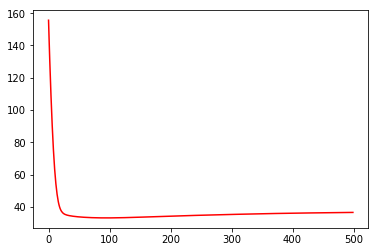

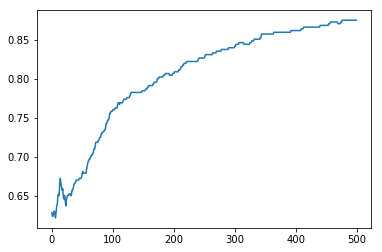

Test Accuracy:  0.894737
MSE: 36.6180


In [12]:
#initialize all the variables
init = tf.global_variables_initializer()

#saver object to save our model
saver = tf.train.Saver()

#call the defined model
y = multilayer_perceptron(x, weights, biases)

#define the cost function (loss function)
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_out))
#optimizer
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

#create session object to launch the graph
sess = tf.Session()
sess.run(init)

#calculate the cost and accuracy for each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    #first run the trainin step by feeding values of X_train and Y_train
    sess.run(training_step, feed_dict={x: X_train, y_out: Y_train})
    #we calaculate the cost or loss function by feeding X_train and Y_train
    cost = sess.run(cost_function, feed_dict={x: X_train, y_out: Y_train})
    #it will append cost_history and cost
    cost_history = np.append(cost_history, cost)
    #we will find out correct prediction (the arguments are bascially the differencte between the actual and model output)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_out, 1))
    #calculate accuracy here
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #get the predictions on the test data
    pred_y = sess.run(y, feed_dict={x: X_test})
    #mean square error gives the difference betewen predicted value and test value
    mse = tf.reduce_mean(tf.square(pred_y - Y_test))
    #launch the graph
    mse_out = sess.run(mse)
    #this will keep updating value for every epoch
    mse_history.append(mse_out)
    #get the accuracy on the training data
    accuracy = (sess.run(accuracy, feed_dict={x: X_train, y_out: Y_train}))
    #keep appending the accuracy
    accuracy_history.append(accuracy)
    
    print('epoch: ', epoch,' - ', 'cost: ',cost,' - MSE: ', mse_out, ' - Train Accuary: ', accuracy)
    
#save the model in model path
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)
    
#plot mse and accuaracy graph
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

#print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_out, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: X_test, y_out: Y_test})))

#print final mean square error
pred_y = sess.run(y, feed_dict={x: X_test})
mse = tf.reduce_mean(tf.square(pred_y - Y_test))
print("MSE: %.4f" % sess.run(mse))

In [13]:
saver = tf.train.Saver()
sess = tf.Session()
sess.run(init)
saver.restore(sess, model_path)

prediction = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_out, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

INFO:tensorflow:Restoring parameters from C:/Users/Nill/Desktop/conda_jupyter/data.cvv_models/TFM


In [14]:
#making predictions

print('******************************************************')
print(" 0 Stands for B i.e. Benign & 1 Stands for M i.e. Malignant")
print('******************************************************')
for i in range(500, 520):
    prediction_run = sess.run(prediction, feed_dict={x: X[i].reshape(1, 30)})
    accuracy_run = sess.run(accuracy, feed_dict={x: X[i].reshape(1, 30), y_out: Y[i].reshape(1, 2)})
    print("Original Class : ", Y[i], " Predicted Values : ", prediction_run[0])

******************************************************
 0 Stands for B i.e. Benign & 1 Stands for M i.e. Malignant
******************************************************
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class :  [ 0.  1.]  Predicted Values :  0
Original Class :  [ 0.  1.]  Predicted Values :  0
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class :  [ 0.  1.]  Predicted Values :  0
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class :  [ 0.  1.]  Predicted Values :  0
Original Class :  [ 0.  1.]  Predicted Values :  0
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class :  [ 1.  0.]  Predicted Values :  0
Original Class